# Machine learning

## Biblioteki

In [1]:
# Importing needed libraries

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
import scipy.stats as ss

In [2]:
X = pd.read_csv('X_ml.csv', sep=',')
y = pd.read_csv('y_ml.csv', sep=',')
y = y['booking_status']
print(f'X: {X.shape}, y: {y.shape}')

X: (36050, 51), y: (36050,)


In [3]:
ss.randint(3, 50)

In [4]:
y

0        0
1        0
2        0
3        0
4        1
        ..
36045    1
36046    0
36047    1
36048    0
36049    0
Name: booking_status, Length: 36050, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#, stratify=y)
X_train.shape, X_test.shape

((25235, 51), (10815, 51))

## LogisticRegression

In [6]:
lr = LogisticRegression()

In [7]:
lr.fit(X_train, y_train)

C:\Users\Amadeusz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
lr.score(X_train, y_train)

0.7749950465623142

In [9]:
lr.score(X_test, y_test)

0.7710587147480351

In [10]:
results = cross_validate(lr, 
               X, y, 
               scoring='accuracy', 
               cv=5, 
               return_train_score=True
              )
results

{'fit_time': array([0.33963037, 0.36032701, 0.37062883, 0.36605763, 0.32119012]),
 'score_time': array([0.        , 0.00331736, 0.        , 0.01360846, 0.        ]),
 'test_score': array([0.77364771, 0.77087379, 0.77656033, 0.77864078, 0.76699029]),
 'train_score': array([0.7757975 , 0.7739251 , 0.77330097, 0.77413315, 0.77676838])}

In [11]:
parameters = {'penalty':('l1', 'l2'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 100, 10000, 100000], 'fit_intercept': (True, False)}
clf = GridSearchCV(estimator=lr, 
                   param_grid=parameters, 
                   cv=5)
clf.fit(X_train, y_train)
# clf.score(X_train, y_train) , clf.score(X_test, y_test)
clf.best_params_

C:\Users\Amadeusz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Amadeusz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

{'C': 100, 'fit_intercept': True, 'penalty': 'l2'}

In [12]:
preds = clf.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)

0.7711511789181692

In [13]:
pipeline = make_pipeline(LogisticRegression(solver='saga', max_iter=10000))

parameters = {'logisticregression__penalty':('l1', 'l2'), 
              'logisticregression__C':[0.5, 1, 10, 100, 1000, 10000, 100000], 
              'logisticregression__fit_intercept': (True, False)}

clf = GridSearchCV(estimator=pipeline, 
                   param_grid=parameters, 
                   cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           solver='saga'))]),
             param_grid={'logisticregression__C': [0.5, 1, 10, 100, 1000, 10000,
                                                   100000],
                         'logisticregression__fit_intercept': (True, False),
                         'logisticregression__penalty': ('l1', 'l2')})

In [14]:
clf.best_params_

{'logisticregression__C': 100,
 'logisticregression__fit_intercept': False,
 'logisticregression__penalty': 'l2'}

In [15]:
preds = clf.best_estimator_.predict(X_test)
accuracy_score(y_test, preds)

0.7711511789181692

## MultinomialNB

In [16]:
mnb = MultinomialNB(alpha=1.0, fit_prior=True)
mnb.fit(X_train, y_train)

MultinomialNB()

In [17]:
mnb.score(X_train, y_train)

0.7165048543689321

In [18]:
mnb.score(X_test, y_test)

0.7078132223763292

## SVM

In [19]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [20]:
svc.score(X_train, y_train) , svc.score(X_test, y_test)

(0.7647711511789181, 0.7587609801202034)

## DecisionTreeClassifier

In [21]:
tree_sk = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=5)
tree_sk.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [22]:
tree_sk.score(X_train, y_train), tree_sk.score(X_test, y_test)

(0.8015851000594413, 0.770781322237633)

## PCA

In [23]:
pca= PCA()
pca.fit(X_train)

PCA()

In [24]:
pca.explained_variance_ratio_

array([1.35279953e-01, 8.28260510e-02, 6.43302499e-02, 5.68378095e-02,
       5.09843027e-02, 4.96535530e-02, 4.75228083e-02, 4.31081607e-02,
       3.75946946e-02, 3.61182702e-02, 3.48454147e-02, 3.07113505e-02,
       2.50970342e-02, 2.31595274e-02, 2.25263978e-02, 2.23168000e-02,
       1.96512500e-02, 1.91580035e-02, 1.77271725e-02, 1.66853600e-02,
       1.60878653e-02, 1.53621512e-02, 1.45091268e-02, 1.29152541e-02,
       1.16899356e-02, 1.10376310e-02, 1.04002767e-02, 9.24894893e-03,
       8.93447100e-03, 8.45536478e-03, 7.55972423e-03, 6.55087616e-03,
       6.50220103e-03, 5.81631967e-03, 4.85997772e-03, 4.22040970e-03,
       2.62634268e-03, 2.10120054e-03, 1.93469792e-03, 1.42351695e-03,
       6.94800195e-04, 4.85781967e-04, 4.48961957e-04, 1.12633058e-29,
       7.92572164e-30, 5.26809226e-30, 1.22189049e-31, 8.69026226e-32,
       3.64737031e-32, 1.70359387e-32, 8.15724595e-33])

In [25]:
len(pca.explained_variance_ratio_)

51

<BarContainer object of 51 artists>

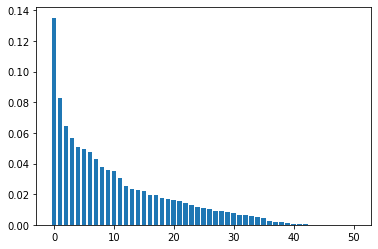

In [26]:
plt.bar(range(51), pca.explained_variance_ratio_)

Text(0.5, 1.0, 'Skumulowane wariancje po każdym komponencie')

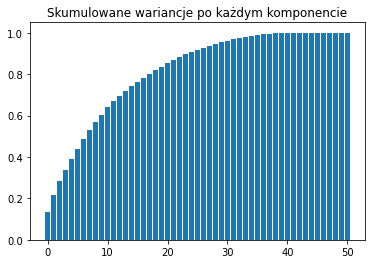

In [27]:
plt.bar(range(51), np.cumsum(pca.explained_variance_ratio_))
plt.title('Skumulowane wariancje po każdym komponencie')

## RandomForestClassifier

In [28]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=30)
random_forest.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=30)

In [29]:
feature_imp = random_forest.feature_importances_
new = pd.concat([pd.Series(random_forest.feature_names_in_), pd.Series(feature_imp)], axis=1)
new.sort_values(by=[1] , ascending=False)

,0,1
2,no_of_special_requests,0.219557
42,market_segment_type_1,0.107634
19,lead_time_0,0.077385
23,lead_time_4,0.054307
41,market_segment_type_0,0.047948
20,lead_time_1,0.038373
48,avg_price_per_room_2,0.030247
22,lead_time_3,0.026880
47,avg_price_per_room_1,0.024159
21,lead_time_2,0.023908
